# 데이터 전처리
* 중복행 확인 및 제거
* 데이터 범위 필터링
* 이상치 탐색 및 제거

# 중복행 확인 및 제거

In [1]:
# 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings # 경고메세지 무시하기
warnings.filterwarnings(action='ignore')

<AxesSubplot:title={'center':'한글폰트'}>

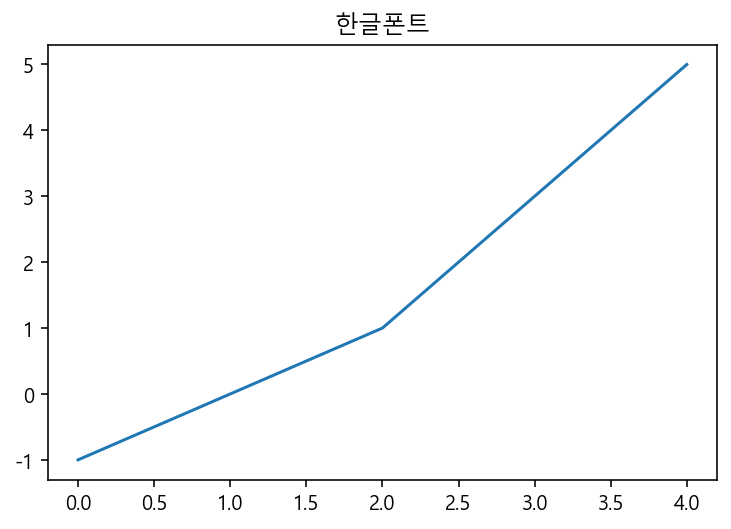

In [2]:
# 한글폰트

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) #마이너스 코드 
pd.options.display.float_format = '{:.3f}'.format
from IPython.display import set_matplotlib_formats #폰트 선명하게 설정.
set_matplotlib_formats('retina') 
pd.Series([-1,0,1,3,5]).plot(title="한글폰트") # 한글폰트와 마이너스 폰트 설정 확인

In [3]:
# 데이터 로드

df = pd.read_csv('df_shop.csv', parse_dates=['구매일자'])
df.drop(columns = ['총_쇼핑소비금액'], inplace=True)
df.shape

(3447070, 13)

In [4]:
# 중복 행 확인

df.duplicated().sum()

171231

In [5]:
# 중복 행 제거

df = df.drop_duplicates()
df

,ID,성별,연령대,시도,시군구,구매일자,구매시간,구매금액,구매수량,업종,소분류명,중분류명,대분류명
0,1,남성,60대,서울특별시,강동구,2015-12-16,17,28000,1,백화점,수입주방,주방용품,가정
1,1,남성,60대,서울특별시,강동구,2015-05-13,14,15000,1,백화점,수입주방,주방용품,가정
2,1,남성,60대,서울특별시,강동구,2015-08-01,19,166400,1,백화점,N/B골프의류,골프용품,스포츠
3,1,남성,60대,서울특별시,강동구,2015-12-28,12,166000,1,백화점,란제리,란제리/내의,여성의류
4,1,남성,60대,서울특별시,강동구,2015-05-13,12,1000,2,백화점,어묵,젓갈/반찬,식품
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447065,19998,남성,40대,경상남도,김해시,2015-12-26,17,15000,1,대형마트,남성병행수입,병행수입,남성의류편집
3447066,19998,남성,40대,경상남도,김해시,2015-12-26,14,40000,4,대형마트,일반화장품,기초화장품,브랜드화장품
3447067,19998,남성,40대,경상남도,김해시,2015-12-26,14,8000,8,대형마트,일반화장품,기초화장품,브랜드화장품
3447068,19998,남성,40대,경상남도,김해시,2015-12-26,14,500,5,대형마트,일반화장품,기초화장품,브랜드화장품


# 데이터 범위 필터링
* 시도: 서울특별시
* 대분류명: 식품

In [6]:
df = df[df['시도'] == '서울특별시']
df = df[df['대분류명'] == '식품']
df

,ID,성별,연령대,시도,시군구,구매일자,구매시간,구매금액,구매수량,업종,소분류명,중분류명,대분류명
4,1,남성,60대,서울특별시,강동구,2015-05-13,12,1000,2,백화점,어묵,젓갈/반찬,식품
5,1,남성,60대,서울특별시,강동구,2015-05-13,12,6900,1,백화점,어묵,젓갈/반찬,식품
6,1,남성,60대,서울특별시,강동구,2015-05-13,12,2400,2,백화점,어묵,젓갈/반찬,식품
7,1,남성,60대,서울특별시,강동구,2015-05-13,12,1000,1,백화점,어묵,젓갈/반찬,식품
8,1,남성,60대,서울특별시,강동구,2015-11-04,18,3200,1,백화점,디저트류,차/커피,식품
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446544,19952,남성,20대,서울특별시,광진구,2015-12-11,14,8700,1,백화점,스넥(부대),가공식품,식품
3446546,19952,남성,20대,서울특별시,광진구,2015-12-18,16,3000,1,백화점,전문베이커리,가공식품,식품
3446550,19952,남성,20대,서울특별시,광진구,2015-12-21,12,8500,1,백화점,식당가 한식,가공식품,식품
3446551,19952,남성,20대,서울특별시,광진구,2015-12-21,12,9000,1,백화점,식당가 한식,가공식품,식품


In [7]:
df['중분류명'].unique()

array(['젓갈/반찬', '차/커피', '가공식품', '육류', '농산물', '주류', '수산품', '건강식품', '축산가공',
       '일용잡화', '과자', '음료'], dtype=object)

# 이상치 탐색

## 구매금액 탐색 

<AxesSubplot:xlabel='구매금액', ylabel='Density'>

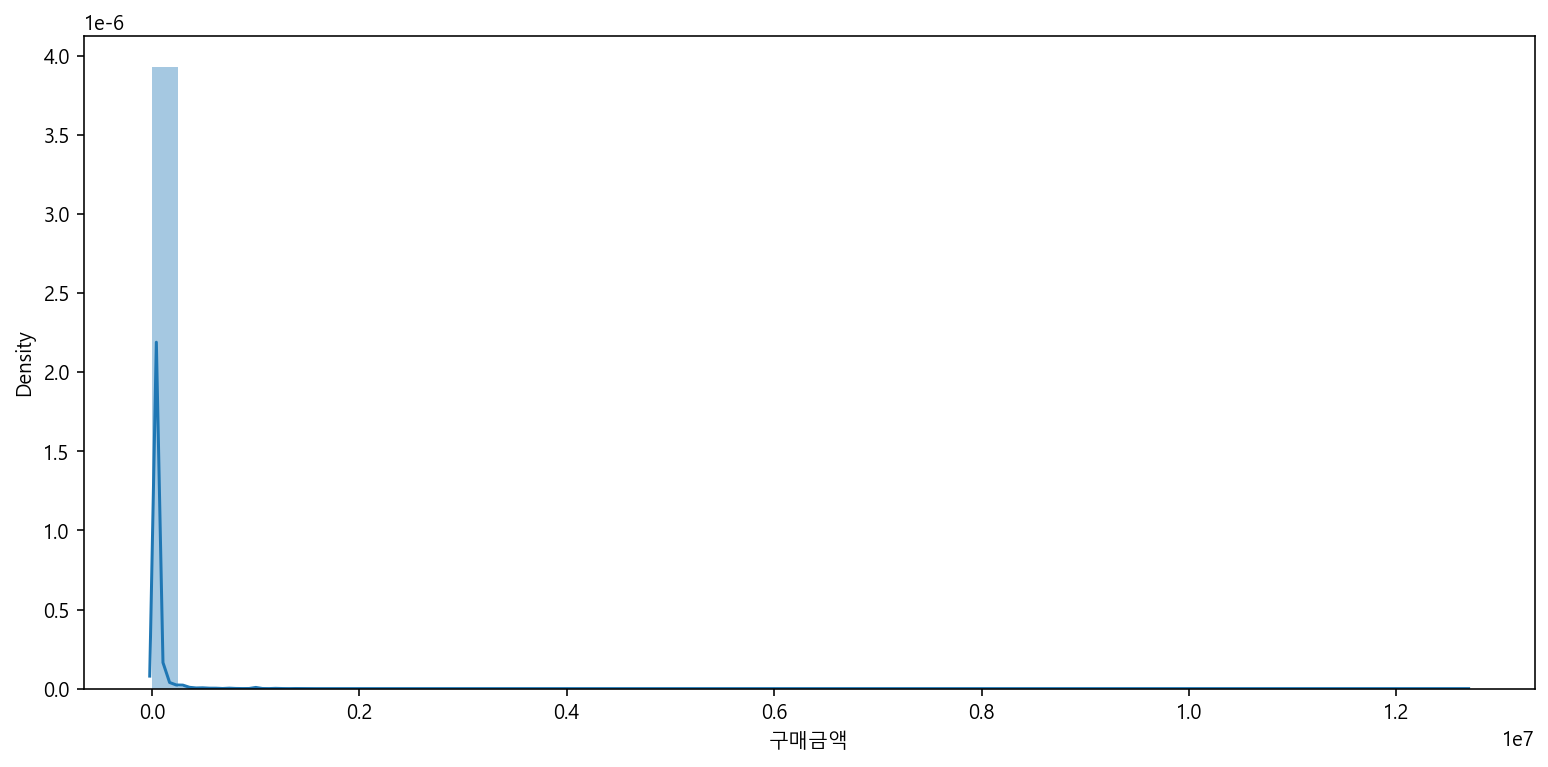

In [8]:
plt.figure(figsize=(13, 6))
sns.distplot(df['구매금액'])

distplot을 그려본결과 한 쪽에만 값이 몰려있는 모습

In [9]:
df['구매금액'].describe()

count     226333.000
mean       15143.846
std        86880.443
min           10.000
25%         3800.000
50%         7600.000
75%        13000.000
max     12675000.000
Name: 구매금액, dtype: float64

In [11]:
df['구매금액'].sort_values(ascending=False).head(10)

1900875    12675000
2549431    10240000
2500687    10088000
416319     10000000
416238     10000000
2500708     9812000
2500665     9629000
1900876     8635000
2500604     8028000
276621      5117000
Name: 구매금액, dtype: int64

In [12]:
df[df['구매금액'] == 10088000]

,ID,성별,연령대,시도,시군구,구매일자,구매시간,구매금액,구매수량,업종,소분류명,중분류명,대분류명
2500687,11802,남성,30대,서울특별시,강서구,2015-09-11,16,10088000,1,백화점,선어세트,수산품,식품


선어세트 하나에 천만원이 넘는다는 것이 상식적으로 말이 되지 않음

In [13]:
df['구매금액'].sort_values(ascending=False).tail(10)

3267796    40
2496838    40
350144     40
3046036    40
872219     40
713035     40
3046020    40
906277     30
3409373    30
652445     10
Name: 구매금액, dtype: int64

In [16]:
df[df['구매금액'] == 10]

,ID,성별,연령대,시도,시군구,구매일자,구매시간,구매금액,구매수량,업종,소분류명,중분류명,대분류명
652445,2867,여성,50대,서울특별시,송파구,2015-01-29,15,10,1,백화점,돈육,육류,식품


육류가 금액이 10원이라는 것도 말이 안 됨

## 구매금액 이상치 제거

In [17]:
# 0.25, 0.75로 자르는 경우 너무 많은 데이터가 잘릴 수 있으므로 최소한의 제거를 위해 0.05, 0.95 선택

Q1 = df['구매금액'].quantile(0.05)
Q3 = df['구매금액'].quantile(0.95)
IQR = Q3 - Q1



# 최대값의 경우 비싼 홍삼세트 같은 제품이 있었기에 범위를 Q3 + 1.5*IQR로 넓게 지정  

df = df[(df['구매금액'] >= Q1) & (df['구매금액'] <= Q3 + 1.5*IQR)]
df

,ID,성별,연령대,시도,시군구,구매일자,구매시간,구매금액,구매수량,업종,소분류명,중분류명,대분류명
5,1,남성,60대,서울특별시,강동구,2015-05-13,12,6900,1,백화점,어묵,젓갈/반찬,식품
6,1,남성,60대,서울특별시,강동구,2015-05-13,12,2400,2,백화점,어묵,젓갈/반찬,식품
8,1,남성,60대,서울특별시,강동구,2015-11-04,18,3200,1,백화점,디저트류,차/커피,식품
10,1,남성,60대,서울특별시,강동구,2015-06-10,19,5000,1,백화점,"제과,제빵",가공식품,식품
14,1,남성,60대,서울특별시,강동구,2015-01-28,13,18000,2,백화점,식당가 한식,가공식품,식품
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446544,19952,남성,20대,서울특별시,광진구,2015-12-11,14,8700,1,백화점,스넥(부대),가공식품,식품
3446546,19952,남성,20대,서울특별시,광진구,2015-12-18,16,3000,1,백화점,전문베이커리,가공식품,식품
3446550,19952,남성,20대,서울특별시,광진구,2015-12-21,12,8500,1,백화점,식당가 한식,가공식품,식품
3446551,19952,남성,20대,서울특별시,광진구,2015-12-21,12,9000,1,백화점,식당가 한식,가공식품,식품


In [18]:
df.describe()

,ID,구매시간,구매금액,구매수량
count,211974.000,211974.000,211974.000,211974.000
mean,7078.043,15.717,11586.202,1.998
std,5370.620,2.665,12470.520,20.416
min,1.000,0.000,1210.000,1.000
25%,2520.000,14.000,4000.000,1.000
50%,5891.000,16.000,8000.000,1.000
75%,11073.000,18.000,13090.000,1.000
max,19953.000,23.000,98100.000,985.000


## 구매수량 탐색

<AxesSubplot:xlabel='구매수량', ylabel='Density'>

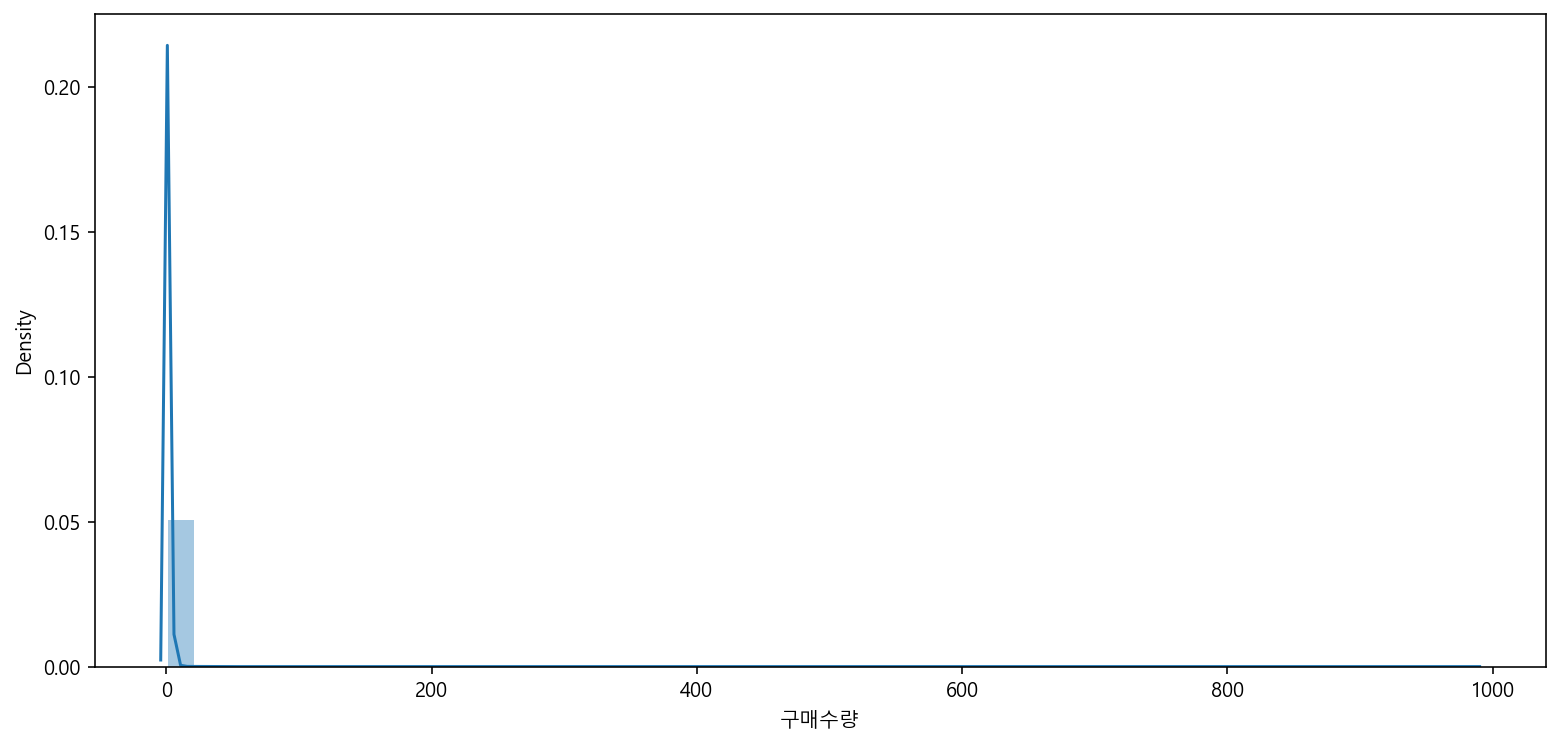

In [20]:
plt.figure(figsize=(13, 6))
sns.distplot(df['구매수량'])

구매수량 역시 앞 쪽에 값이 몰려있는 모습

In [22]:
df['구매수량'].describe()

count   211974.000
mean         1.998
std         20.416
min          1.000
25%          1.000
50%          1.000
75%          1.000
max        985.000
Name: 구매수량, dtype: float64

<AxesSubplot:xlabel='구매수량', ylabel='Density'>

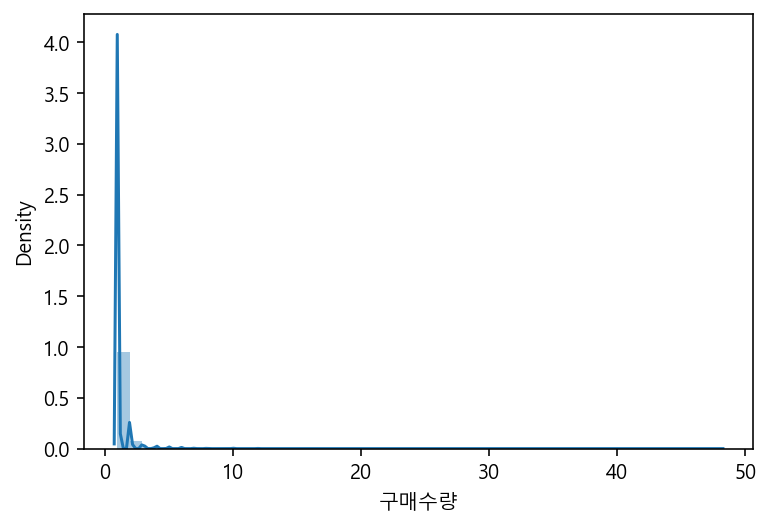

In [27]:
# 값을 50개로 한정했을때의 distplot

sns.distplot(df[df['구매수량'] < 50]['구매수량'])

<AxesSubplot:xlabel='구매수량', ylabel='Density'>

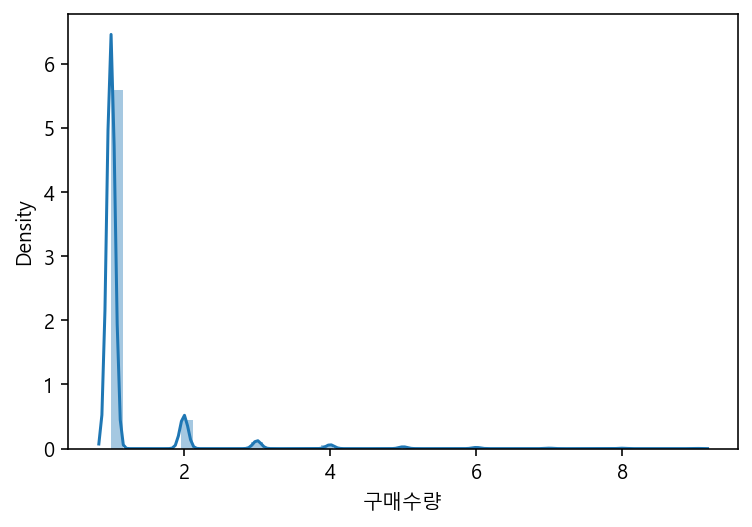

In [28]:
# 값을 10개로 한정했을때의 distplot

sns.distplot(df[df['구매수량'] < 10]['구매수량'])

값을 10개로 한정했을 때도 distplot의 분포가 앞 쪽에 많이 쏠려있으므로 구매수량의 범위는 10 미만으로 지정

In [30]:
# 최종 데이터

df = df[df['구매수량'] < 10]
df

,ID,성별,연령대,시도,시군구,구매일자,구매시간,구매금액,구매수량,업종,소분류명,중분류명,대분류명
5,1,남성,60대,서울특별시,강동구,2015-05-13,12,6900,1,백화점,어묵,젓갈/반찬,식품
6,1,남성,60대,서울특별시,강동구,2015-05-13,12,2400,2,백화점,어묵,젓갈/반찬,식품
8,1,남성,60대,서울특별시,강동구,2015-11-04,18,3200,1,백화점,디저트류,차/커피,식품
10,1,남성,60대,서울특별시,강동구,2015-06-10,19,5000,1,백화점,"제과,제빵",가공식품,식품
14,1,남성,60대,서울특별시,강동구,2015-01-28,13,18000,2,백화점,식당가 한식,가공식품,식품
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446544,19952,남성,20대,서울특별시,광진구,2015-12-11,14,8700,1,백화점,스넥(부대),가공식품,식품
3446546,19952,남성,20대,서울특별시,광진구,2015-12-18,16,3000,1,백화점,전문베이커리,가공식품,식품
3446550,19952,남성,20대,서울특별시,광진구,2015-12-21,12,8500,1,백화점,식당가 한식,가공식품,식품
3446551,19952,남성,20대,서울특별시,광진구,2015-12-21,12,9000,1,백화점,식당가 한식,가공식품,식품


# 전처리 완료 df CSV 저장

In [31]:
# df.to_csv('전처리완료최종데이터.csv', index=False)

In [32]:
# 엑셀 저장
# df.to_excel('전처리완료최종데이터.xlsx', index=False)